#Actividad Regresion Lineal 2
Ernesto Reynoso Lizárraga A01639915

### Base de datos completa. No se observan valores faltantes. En caso de haberlos se realiza imputación simple.

In [152]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
df= pd.read_csv("/content/drive/MyDrive/Inteligencia Artificial/breast_cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [153]:
df = df.drop(['id','diagnosis'],axis=1)

###Mostrar que las variables regresoras son independientes. En caso de no serlo realizar el procedimiento correspondiente.

In [154]:
correlacion = df.corr()

In [155]:
alta_corr=np.where((correlacion > 0.95) & (correlacion < 1))

In [156]:
alta_corr

(array([ 0,  0,  0,  0,  2,  2,  2,  2,  3,  3,  3,  3,  3, 10, 10, 12, 13,
        20, 20, 20, 20, 20, 22, 22, 22, 22, 22, 23, 23, 23]),
 array([ 2,  3, 20, 22,  0,  3, 20, 22,  0,  2, 20, 22, 23, 12, 13, 10, 10,
         0,  2,  3, 22, 23,  0,  2,  3, 20, 23,  3, 20, 22]))

In [157]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [158]:
df_estandar = scaler.fit_transform(df)

In [159]:
df_estandar = pd.DataFrame(df_estandar,columns=df.columns)
df_estandar

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [160]:
from sklearn.model_selection import train_test_split
entrenamiento, prueba = train_test_split(df_estandar, test_size=0.2, random_state=42)
entrenamiento

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,-1.447987,-0.456023,-1.366651,-1.150124,0.728714,0.700428,2.814833,-0.133333,1.093024,2.503828,...,-1.234044,-0.492965,-1.243893,-0.977194,0.693984,1.159269,4.700669,0.919592,2.147190,1.859432
181,1.977508,1.694187,2.089619,1.866047,1.262455,3.389643,2.007548,2.596960,2.129892,1.585220,...,2.155897,1.270634,2.062335,2.124291,0.733436,3.207003,1.946890,2.675218,1.936879,2.463465
63,-1.407089,-1.263516,-1.349763,-1.120545,-1.362838,-0.318972,-0.363081,-0.699511,1.932741,0.968562,...,-1.296169,-1.049890,-1.241212,-1.002860,-1.490797,-0.550038,-0.635617,-0.970486,0.616770,0.052877
248,-0.987600,1.380033,-0.986877,-0.875668,0.014925,-0.606466,-0.816190,-0.845247,0.311723,0.069801,...,-0.832304,1.549097,-0.872165,-0.746907,0.768505,-0.728158,-0.766109,-0.810759,0.822228,-0.137199
60,-1.123927,-1.026155,-1.129395,-0.975496,1.212639,-0.449737,-0.978777,-0.929077,3.400421,0.964310,...,-1.087016,-1.339752,-1.114026,-0.900022,-0.213419,-0.989865,-1.201820,-1.352369,1.061659,-0.207578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-1.488033,-1.082004,-1.366651,-1.168611,0.104593,0.924055,-0.034392,-0.521016,0.329977,3.827870,...,-1.353531,-1.629614,-1.331463,-1.048038,-0.511503,-0.067845,-0.617866,-1.016318,-1.046309,1.355149
106,-0.706426,-0.223317,-0.691956,-0.689379,1.269571,-0.050051,-0.227236,-0.362899,-0.038768,0.340564,...,-0.648001,0.583433,-0.647878,-0.630885,1.597003,0.074651,0.072498,0.109537,-0.153294,0.389251
270,0.046211,-0.574704,-0.068748,-0.063392,-2.282296,-1.470464,-1.023849,-1.100607,-1.108494,-1.281175,...,-0.281464,-0.818652,-0.381891,-0.344521,-2.047074,-1.297121,-1.120358,-1.237560,-0.716282,-1.260478
435,-0.041833,0.076875,-0.034972,-0.157532,0.686015,0.169787,0.298817,0.405245,-0.520693,0.374586,...,0.159621,0.834212,0.197742,-0.019835,1.268234,0.652266,0.646282,1.036837,0.450138,1.194443


In [161]:
entrenamiento.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Hipótesis nula de los coeficientes de regresión. Estadístico de prueba, distribución del estadístico de prueba.

In [162]:
import statsmodels.formula.api as smf
modelo = smf.ols(formula = 'radius_mean~texture_mean+perimeter_mean+area_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+texture_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.725e+04
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:13:15   Log-Likelihood:                 1235.3
No. Observations:                 455   AIC:                            -2419.
Df Residuals:                     429   BIC:                            -2311.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

El modelo nos muestra que tiene una distribucion t-student

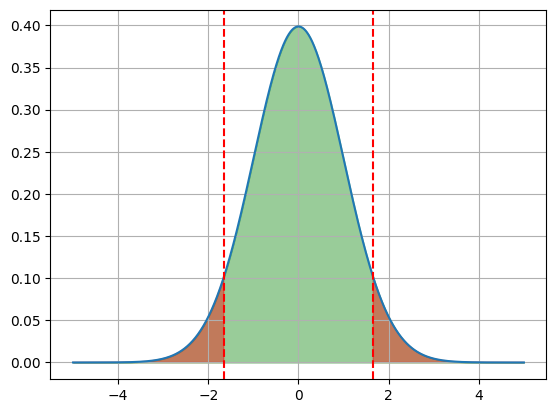

In [185]:
alpha = 1 - 0.95

crit_value = stats.t.ppf(1-alpha, entrenamiento.shape[0]-1)

lim_negativo = -crit_value
lim_positivo = crit_value

x = np.linspace(-5,5,1000)

pdf = stats.t.pdf(x, entrenamiento.shape[0]-1)
plt.plot(x, pdf)

plt.fill_between(x, pdf, where=(x < crit_value) | (x > -crit_value), color='green', alpha=0.4)
plt.fill_between(x, pdf, where=(x >= crit_value) | (x <= -crit_value), color='red', alpha=0.4)

plt.axvline (lim_negativo, color = 'red', linestyle='--')
plt.axvline (lim_positivo, color = 'red', linestyle='--')
plt.grid(True)
plt.show()

### Hipótesis nula de la significancia del modelo (prueba F-Fisher). Menciona que distribución tiene el estadístico de prueba con qué número de grados de libertad. Para un 95% de confianza realiza un diagrama en donde se muestre la distribución del estadístico de prueba, la zona de aceptación y la zona de rechazo.

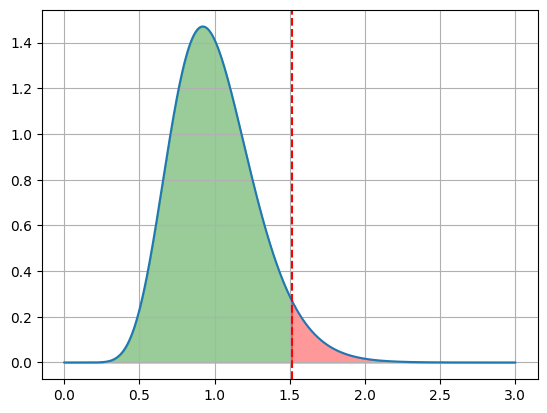

In [189]:
confianza =0.95

crit_value = stats.f.ppf(confianza, 27, entrenamiento.shape[0]-28)
x = np.linspace(0,3,10000)

pdf = stats.f.pdf(x, dfn= 27, dfd= entrenamiento.shape[0]-28)
plt.plot(x, pdf)

plt.fill_between(x, pdf, where=(x < crit_value), color='green', alpha=0.4)
plt.fill_between(x, pdf, where=(x >= crit_value), color='red', alpha=0.4)

plt.axvline (crit_value, color = 'red', linestyle='--')
#plt.axvline (modelo.fvalue, color = 'red', linestyle='--')
plt.grid(True)
plt.show()

### Realiza un modelo de regresión hacia atrás (backward). Explica el criterio para ir eliminando variables del modelo.

In [165]:
modelo = smf.ols(formula = 'radius_mean~texture_mean+perimeter_mean+area_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+texture_se+perimeter_se+area_se+compactness_se+concavity_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.022e+04
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:13:15   Log-Likelihood:                 1235.3
No. Observations:                 455   AIC:                            -2421.
Df Residuals:                     430   BIC:                            -2318.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [167]:
modelo = smf.ols(formula = 'radius_mean~texture_mean+perimeter_mean+area_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+texture_se+perimeter_se+area_se+compactness_se+concavity_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.343e+04
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:16:49   Log-Likelihood:                 1235.2
No. Observations:                 455   AIC:                            -2422.
Df Residuals:                     431   BIC:                            -2324.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [168]:
modelo = smf.ols(formula = 'radius_mean~texture_mean+perimeter_mean+area_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+texture_se+perimeter_se+area_se+compactness_se+concavity_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.693e+04
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:18:13   Log-Likelihood:                 1235.2
No. Observations:                 455   AIC:                            -2424.
Df Residuals:                     432   BIC:                            -2330.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [169]:
modelo = smf.ols(formula = 'radius_mean~texture_mean+perimeter_mean+area_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+area_se+compactness_se+concavity_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.078e+04
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:19:00   Log-Likelihood:                 1235.2
No. Observations:                 455   AIC:                            -2426.
Df Residuals:                     433   BIC:                            -2336.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [170]:
modelo = smf.ols(formula = 'radius_mean~texture_mean+perimeter_mean+area_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+compactness_se+concavity_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.500e+04
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:19:33   Log-Likelihood:                 1235.2
No. Observations:                 455   AIC:                            -2428.
Df Residuals:                     434   BIC:                            -2342.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [171]:
modelo = smf.ols(formula = 'radius_mean~texture_mean+perimeter_mean+area_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+compactness_se+concavity_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+compactness_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.964e+04
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:20:11   Log-Likelihood:                 1235.0
No. Observations:                 455   AIC:                            -2430.
Df Residuals:                     435   BIC:                            -2348.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [172]:
modelo = smf.ols(formula = 'radius_mean~texture_mean+perimeter_mean+area_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+concavity_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+compactness_worst+symmetry_worst+fractal_dimension_worst',data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.465e+04
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:20:42   Log-Likelihood:                 1234.6
No. Observations:                 455   AIC:                            -2431.
Df Residuals:                     436   BIC:                            -2353.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [173]:
modelo = smf.ols(formula = 'radius_mean~texture_mean+perimeter_mean+area_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+concavity_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+compactness_worst+symmetry_worst',data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.002e+05
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:21:17   Log-Likelihood:                 1234.0
No. Observations:                 455   AIC:                            -2432.
Df Residuals:                     437   BIC:                            -2358.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

In [174]:
modelo = smf.ols(formula = 'radius_mean~texture_mean+perimeter_mean+area_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+perimeter_se+concavity_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+compactness_worst+symmetry_worst',data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.060e+05
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:21:44   Log-Likelihood:                 1232.6
No. Observations:                 455   AIC:                            -2431.
Df Residuals:                     438   BIC:                            -2361.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

El criterio para eliminar una variable del modelo fue el p-valor, donde se descartaba la variable con el p-valor mas alto (y que excediese 0.05) se volvia a hacer el modelo. esto se realizaba en repetidas ocasiones hasta que no hubiera variables con un p-valor mayor a 0.05

### Comparación entre datos reales y predicción. Análisis de los resultados.

In [197]:
y_pred = modelo.params[0]+ modelo.params[1]* prueba['texture_mean'] + modelo.params[2] * prueba['perimeter_mean'] + modelo.params[3] * prueba['area_mean'] + modelo.params[4] * prueba['compactness_mean'] + modelo.params[5] * prueba['concavity_mean'] + modelo.params[6] * prueba['symmetry_mean'] + modelo.params[7] * prueba['fractal_dimension_mean'] + modelo.params[8] * prueba['perimeter_se'] + modelo.params[9] * prueba['concavity_se'] + modelo.params[10] * prueba['symmetry_se'] + modelo.params[11] * prueba['fractal_dimension_se'] + modelo.params[12] * prueba['radius_worst'] + modelo.params[13] * prueba['perimeter_worst'] + modelo.params[14] * prueba['area_worst'] + modelo.params[15] * prueba['compactness_worst'] + modelo.params[16] * prueba['symmetry_worst']
r = prueba['radius_mean'] - y_pred

In [198]:
r

204   -0.018491
70     0.001705
131   -0.015049
431    0.009664
540    0.001304
         ...   
486   -0.006917
75     0.002282
249   -0.001511
238    0.011553
265    0.043055
Length: 114, dtype: float64

Text(0, 0.5, 'Predicción')

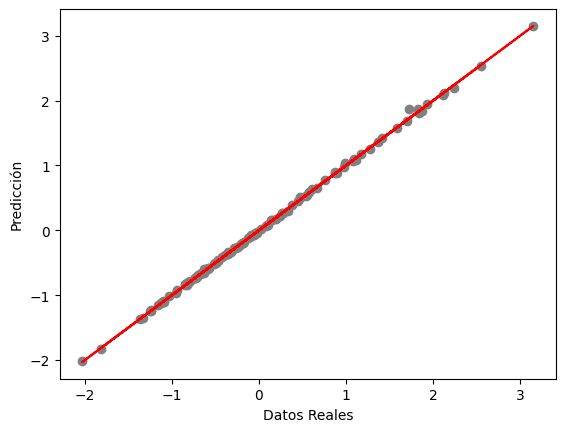

In [194]:
plt.scatter(prueba['radius_mean'],y_pred, color='gray')
plt.plot(prueba['radius_mean'], prueba['radius_mean'], color='red')
plt.xlabel("Datos Reales")
plt.ylabel("Predicción")

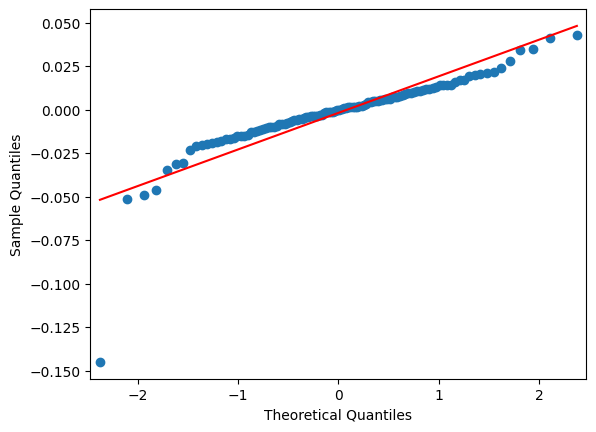

In [196]:
QQ=sm.qqplot(r,stats.norm, line='s')